In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression
from gradvi.inference import Trendfiltering
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma

from mrashpen.utils import R_trendfilter

In [2]:
ChangepointData = collections.namedtuple('CData', 
    ['x', 'y', 'ytrue'])
    #['H', 'Hinv', 'x', 'y', 'ytest', 'ytrue', 'btrue', 'bspline_bases', 'bspline_beta', 'snr'])

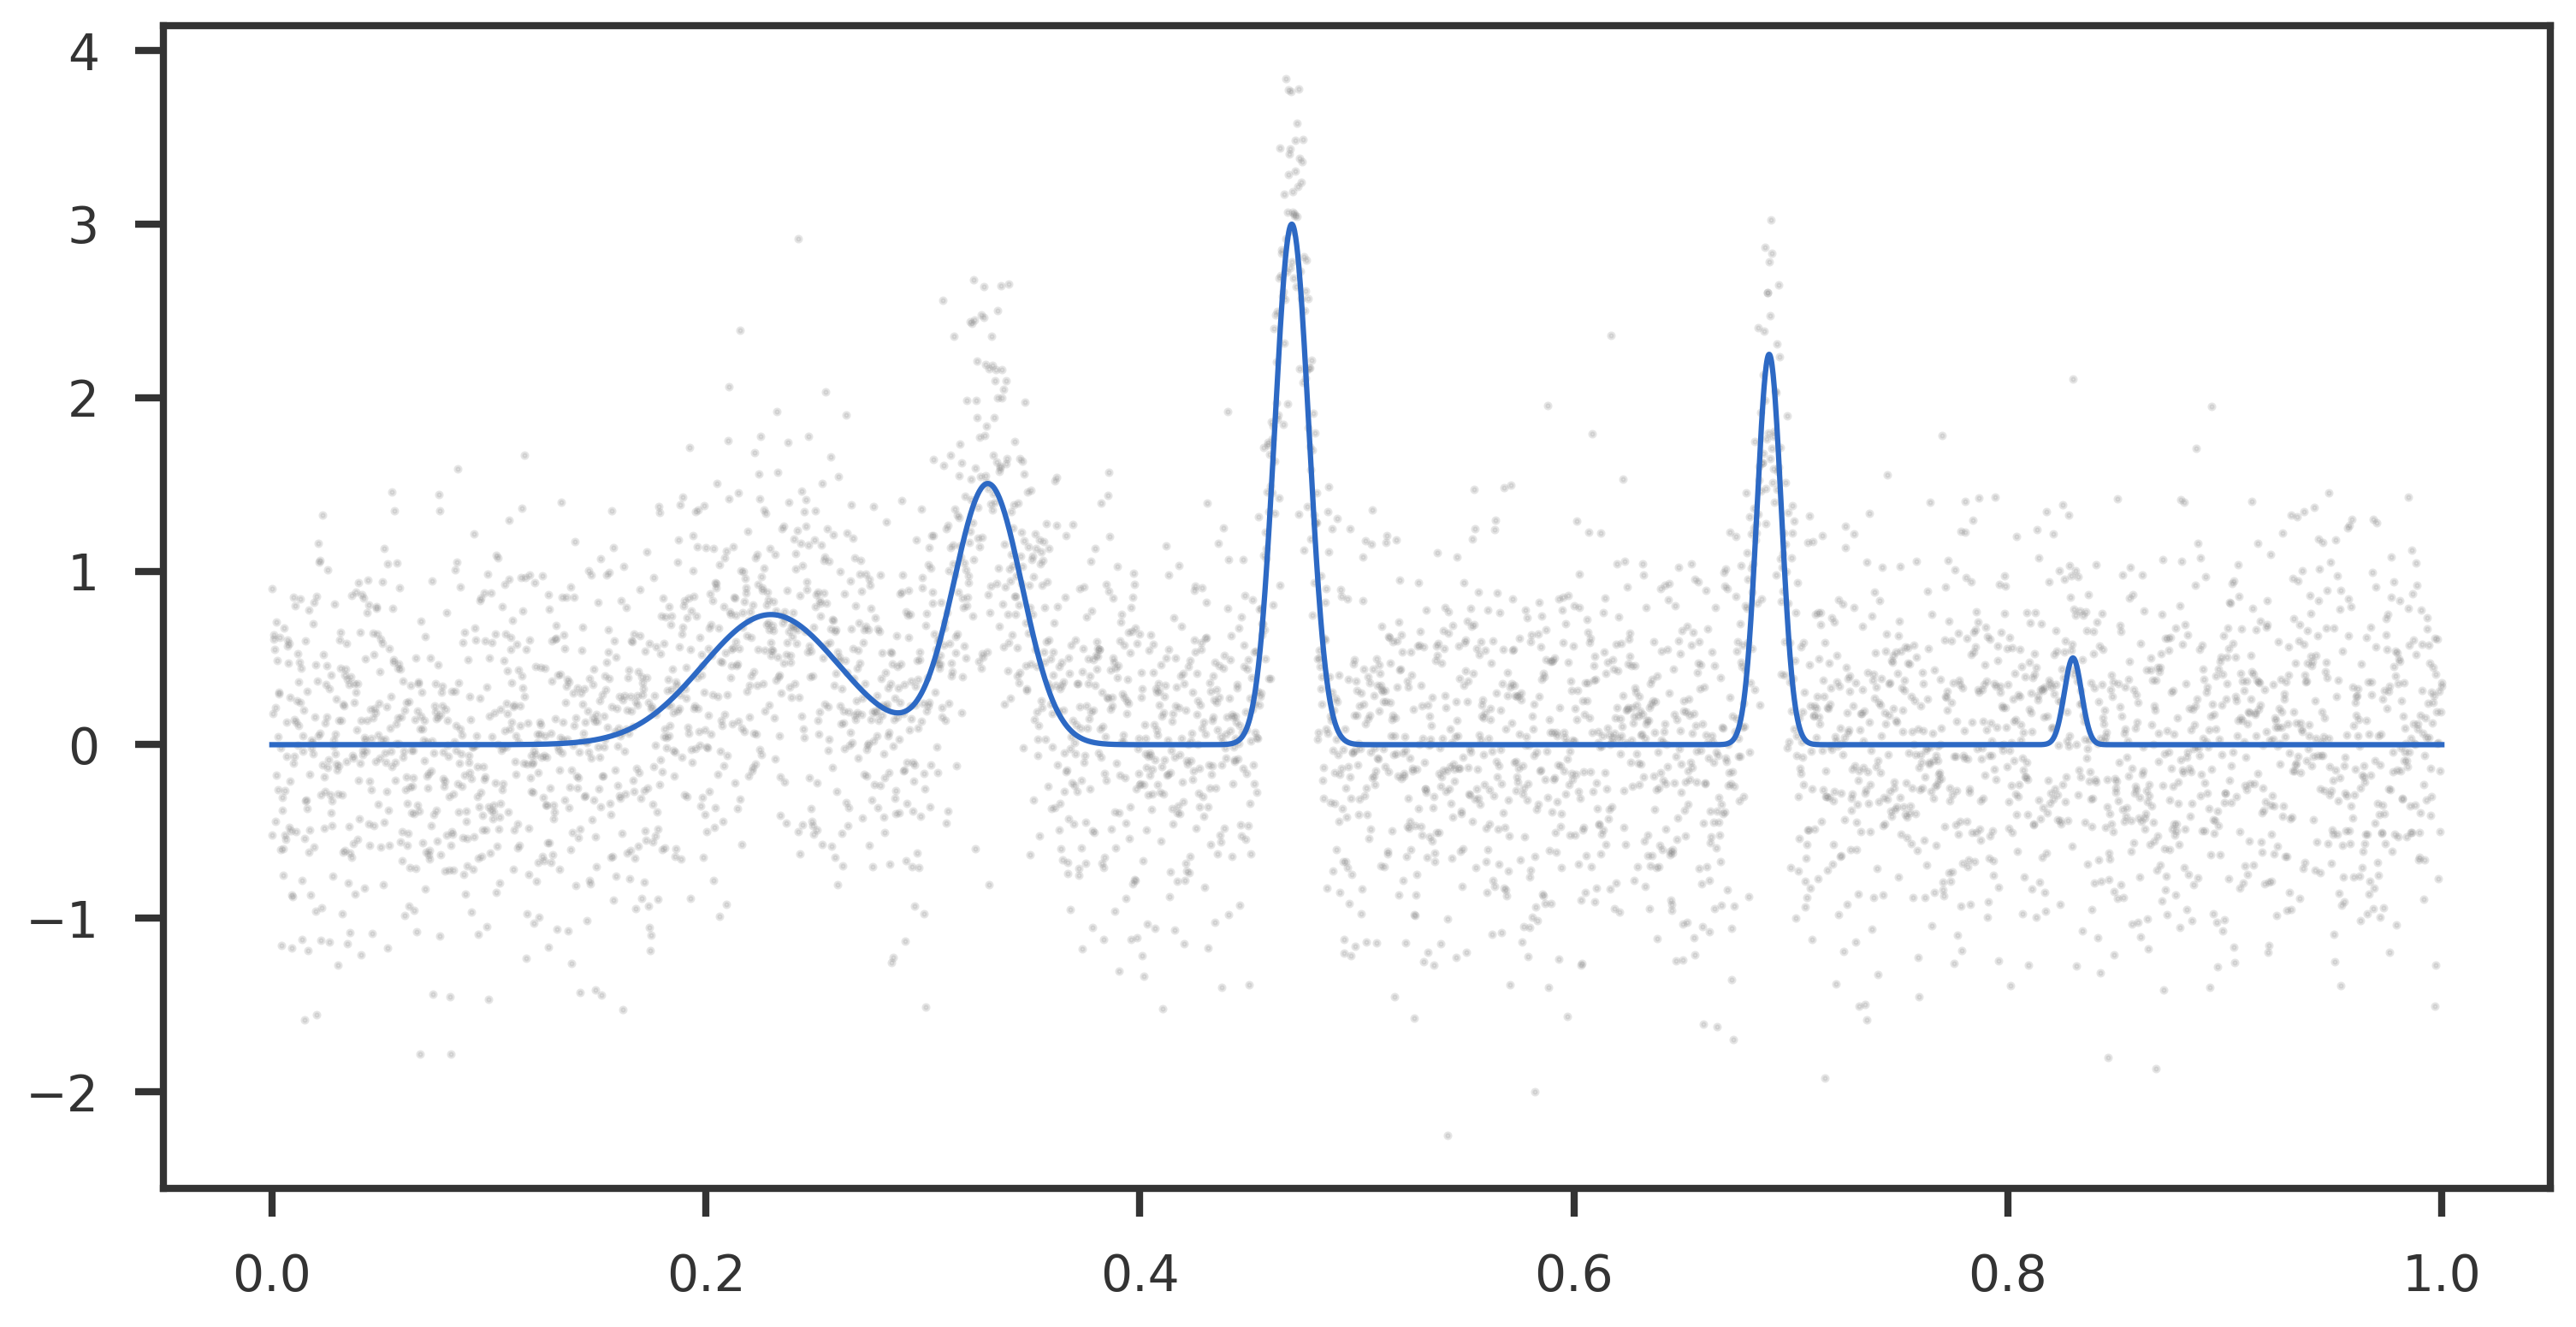

In [3]:
def spike_function(x):
    y = 0.75 * np.exp(-500 * np.square(x-0.23)) + \
         1.5 * np.exp(-2000 * np.square(x-0.33)) + \
           3 * np.exp(-8000 * np.square(x-0.47)) + \
        2.25 * np.exp(-16000 * np.square(x-0.69)) + \
         0.5 * np.exp(-32000 * np.square(x-0.83))
    return y

n = 4096
strue = 0.6

x = np.linspace(0, 1, n)
ytrue = spike_function(x)
noise = np.random.normal(0, strue, size = n)
y = ytrue + noise

data = ChangepointData(x = x, y = y, ytrue = ytrue)


fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(x, ytrue)
plt.show()

In [4]:
degree = 0

In [5]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = degree)
#tf_bhat  = np.dot(data.Hinv, tf_y)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



R[write to console]: Loading required package: Matrix



In [6]:
prior_init = toy_priors.get_ash_scaled(k = 20, sparsity = None, skbase = 2.0)
gv1 = Trendfiltering(maxiter = 20000, scale_tfbasis = False)
gv1.fit(data.y, degree, prior_init)

In [7]:
gv1._res

        b_inv: array([ 0.00179713, -0.0008138 , -0.00073569, ...,  0.17690086,
        0.13869797,  0.05939264])
       b_post: array([ 2.14478128e-07, -9.57677638e-08, -8.65287252e-08, ...,
        4.56046921e-04,  3.29897857e-04,  1.14518155e-04])
       fitobj:       fun: -10973.87021097801
 hess_inv: <4117x4117 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.13155746e-03, -1.25751168e-04, -1.89450613e-04, ...,
        1.61314529e-02,  2.52355236e-02, -1.32288126e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1414
      nit: 1172
     njev: 1414
   status: 0
  success: True
        x: array([ 1.79713496e-03, -8.13798261e-04, -7.35690265e-04, ...,
        1.14918748e+01,  1.00431889e+01,  3.70993077e-01])
          fun: -10973.87021097801
         grad: array([ 3.13155746e-03, -1.25751168e-04, -1.89450613e-04, ...,
        1.61314529e-02,  2.52355236e-02, -1.32288126e+00])
      message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
   

In [8]:
gv2 = Trendfiltering(maxiter = 20000, scale_tfbasis = False)
gv2.fit(data.y, degree, prior_init, y_init = tf_y)

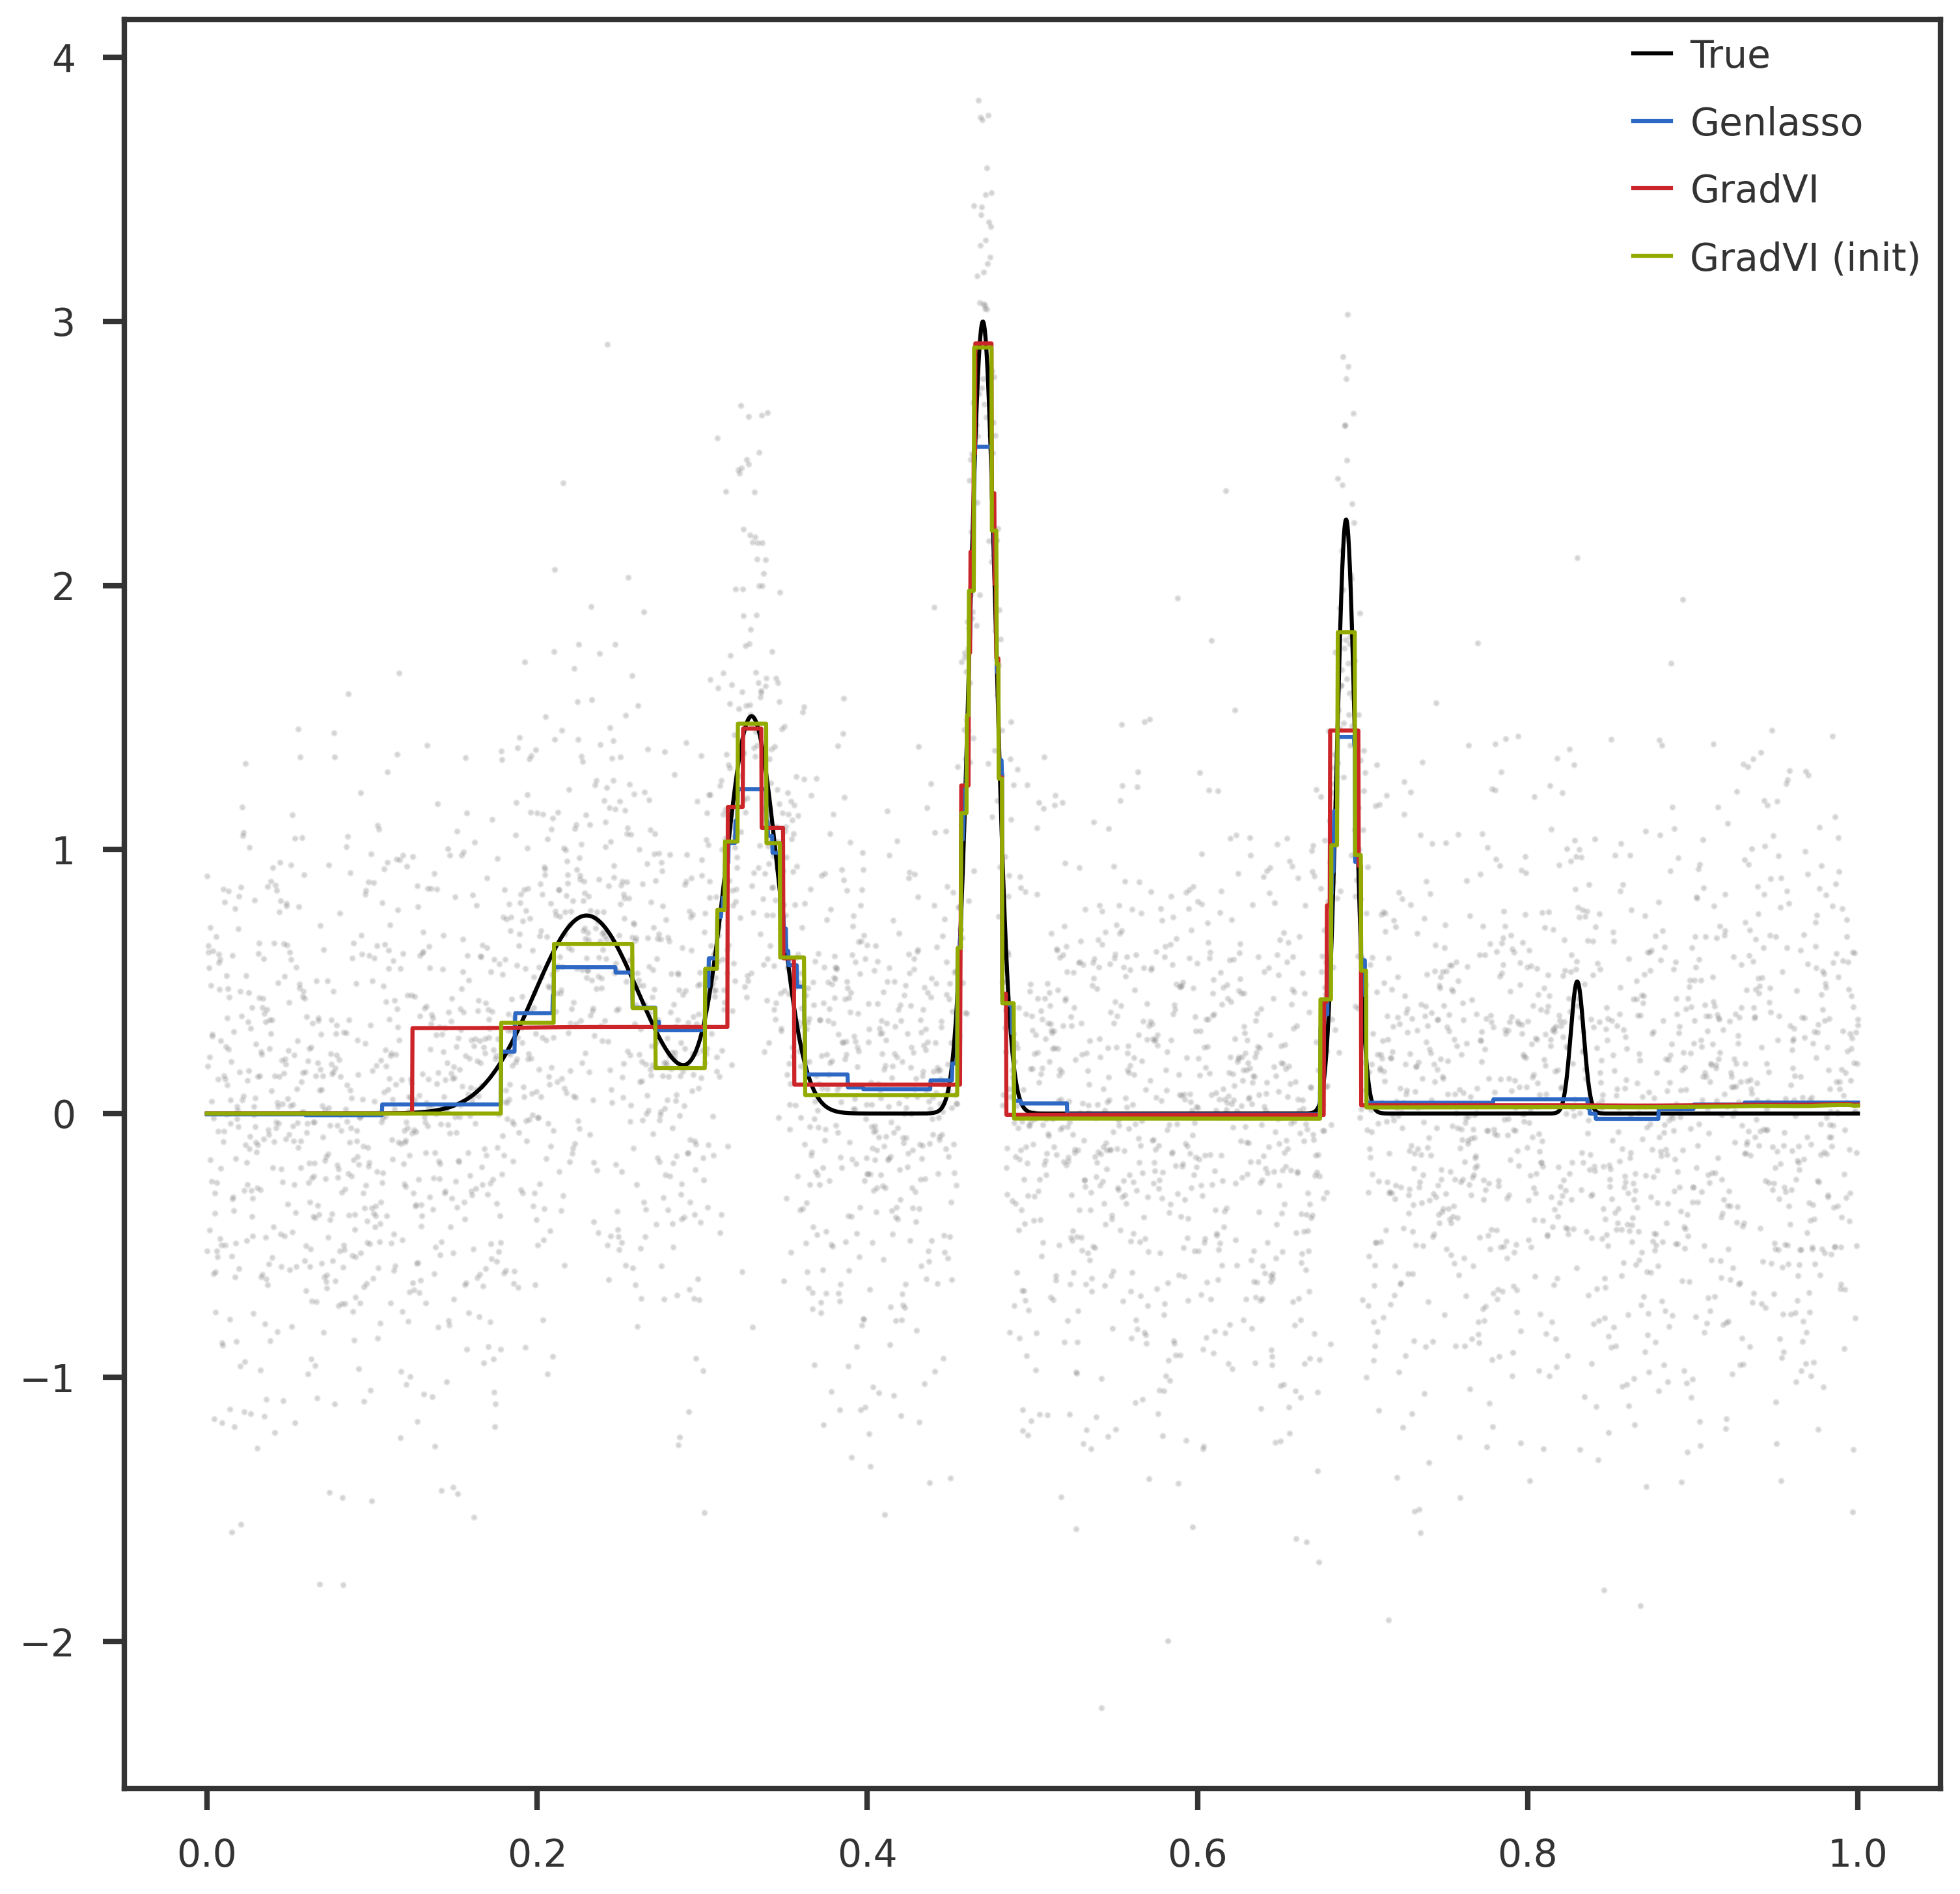

In [13]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(111)
ax1.scatter(data.x, data.y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(data.x, data.ytrue, label = 'True', color = 'black')
# ax1.plot(data.x, tf_y, label = 'Genlasso', color = 'dodgerblue')
# ax1.plot(data.x, gv1.ypred, label = 'GradVI', color = 'fuchsia')
# ax1.plot(data.x, gv2.ypred, label = 'GradVI (init)', color = 'tomato')
ax1.plot(data.x, tf_y, label = 'Genlasso')
ax1.plot(data.x, gv1.ypred, label = 'GradVI')
ax1.plot(data.x, gv2.ypred, label = 'GradVI (init)')

ax1.legend()

fig.savefig("trendfiltering_example_015.png", bbox_inches = 'tight')
plt.show()